In [7]:
import pandas as pd
import quandl
import pandas_datareader as web
import datetime as dt
import matplotlib.pyplot as plt
start = dt.datetime(2018,1,1)
end = dt.datetime.now()
df = web.DataReader('GLD','yahoo',start,end)
df['Volatility'] = (df['High']-df['Adj Close'])/df['Adj Close']*100
df['PCT_change'] = (df['Adj Close']-df['Open'])/df['Open']*100
df = df[['Adj Close','Volatility','PCT_change','Volume']]
df.plot(y='Adj Close')
df.head()

RemoteDataError: No data fetched for symbol NASDAQ using YahooDailyReader

In [2]:
import math
forecast = 'Adj Close'
out = int(math.ceil(.01*len(df)))
df['label']=df[forecast].shift(-out)
df.dropna(inplace=True)
df.tail()

,Adj Close,Volatility,PCT_change,Volume,label
Date,,,,,
2018-12-20,119.239998,0.419322,0.109141,18615100,119.660004
2018-12-21,118.720001,0.446428,-0.394329,13629800,120.570000
2018-12-24,120.019997,0.099986,0.376346,9736400,121.059998
2018-12-26,119.660004,1.119836,-0.795887,14293500,121.250000
2018-12-27,120.570000,0.273701,0.000000,11874400,121.320000


In [200]:
import numpy as np
from sklearn import preprocessing, svm
from sklearn.linear_model import LinearRegression
X = np.array(df.drop(['label'],1))
y = np.array(df['label'])
X = preprocessing.scale(X)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,test_size=.2)
clf = LinearRegression()
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.9644629691806506

In [201]:
lately = X[-out:]
forecast_set = clf.predict(lately)
forecast_set

array([119.15691055, 120.1348979 , 119.85302099])

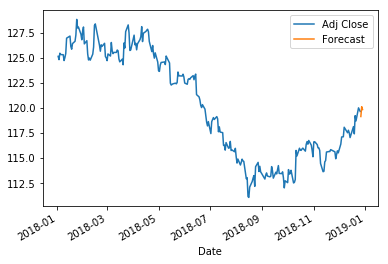

In [202]:
df['Forecast'] = np.nan
last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += one_day
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)] + [i]
df.plot(y='Adj Close')
df['Forecast'].plot()
plt.legend()
plt.show()

In [203]:
lately

array([[-0.27557045,  0.51065674, -0.99464982,  1.81206542],
       [-0.02814331, -0.91252071,  1.08997469,  0.65624404],
       [-0.0966605 ,  3.27700902, -2.08083613,  2.00909595]])